# The evolution of the presence of women’s voices in the media
Team ALLG : Amaia Soubelet, Lilian Haemmerli, Lucie Castella, Gabriel Juri

In [1]:
###Importing all the useful librairies

import time
import json
import bz2
import pandas as pd
import numpy as np
import re
from pathlib import Path
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import glob

### Handling data

In [3]:
###  IMPORTING DATA ###

# Define the path where the data is located

Path = "../quotes-2020.json.bz2" #goes out of the current folder


To decrease the running time, we uploaded and filtered the different year's data one by one on different computers. Here is how it was done for the year 2020. We just changed the path and the name of the output cvs file for the different years. At the end of this document, you can see those cvs files being loaded and the result of each year pictured in pie charts.

In [4]:
#Filtering functions

def find_proba(text):
    num = re.findall(r'-?\d+\.?\d*',text)
    return " ".join(num)

def filter_speakers(chunk_data):

    chunk_data['probas'] = chunk_data['probas'].astype('str')
    chunk_data['number'] = chunk_data['probas'].apply(lambda x: find_proba(x)) #extracts the probability of the given speaker to be correct
    filt_low = chunk_data.drop(chunk_data[chunk_data['number'] < '0.9'].index) #removes lines with low probabilities to have the right speaker (less than 90%)
    filt_prob = filt_low.drop(filt_low[filt_low['speaker'] == 'None'].index) #removes the lines with no speaker
    return filt_prob


The two functions above are used to filter the data. Every quote that does not have a speaker (the speaker is 'None') is removed. We also filtered the quotes depending on the probability that the given speaker is the right one. Every quote with a speaker probability of less than 0.9 was removed. Since our work is studying the gender of the speaker, we needed to be sure that the speakers linked to the quotations are the real speakers.

In [5]:
def process_chunk(chunk):
        print(f'Processing chunk with {len(chunk)} rows')
        print(chunk.columns)

with pd.read_json(Path, lines=True, compression='bz2', chunksize=1_000_000) as df_reader:
    dfs = []
    for chunk in df_reader:
        process_chunk(chunk)        
        filt_chunk = filter_speakers(chunk) #filters the lines we want to remove
        dfs.append(filt_chunk)

Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 244449 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='ob

In [6]:
chunk.head() #not filtered --> to check the difference

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,number
5000000,2020-03-06-047752,"People get killed in wildlife collisions, most...",Dave Marsden,[Q5240722],2020-03-06 17:20:36,3,"[['Dave Marsden', '0.6329'], ['None', '0.3671']]",[http://www.washingtontimes.com/news/2020/mar/...,E,0.6329 0.3671
5000001,2020-01-31-070691,People my age and older have to figure out how...,Michelle Buteau,[Q54861496],2020-01-31 17:47:00,2,"[['Michelle Buteau', '0.8651'], ['None', '0.13...",[https://www.nbcnews.com/news/nbcblk/michelle-...,E,0.8651 0.1349
5000002,2020-03-26-047932,People now have time on their hands and they w...,Gary Gray,"[Q21228842, Q3758498, Q5525157, Q5525158, Q552...",2020-03-26 19:43:00,1,"[['Gary Gray', '0.8611'], ['None', '0.1389']]",[http://capenews.net/sandwich/news/business-is...,E,0.8611 0.1389
5000003,2020-01-10-061824,People should not recourse to violent methods ...,Peter Machado,[Q1385539],2020-01-10 03:04:23,1,"[['Peter Machado', '0.9013'], ['None', '0.0987']]",[https://www.newkerala.com/news/2020/4460.htm],E,0.9013 0.0987
5000004,2020-04-02-047663,People think it's novel that 80-year-olds are ...,Candace Owens,[Q43302090],2020-04-02 12:27:27,2,"[['Candace Owens', '0.7324'], ['Anthony Fauci'...",[https://www.news18.com/news/world/alarm-denia...,E,0.7324 0.1735 0.0903 0.0038


In [7]:
filt_chunk.head() #filtered 

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,number
5000003,2020-01-10-061824,People should not recourse to violent methods ...,Peter Machado,[Q1385539],2020-01-10 03:04:23,1,"[['Peter Machado', '0.9013'], ['None', '0.0987']]",[https://www.newkerala.com/news/2020/4460.htm],E,0.9013 0.0987
5000016,2020-03-18-052109,"Please stay away... while crews assess damage,",Gary Herbert,[Q881188],2020-03-18 08:48:00,1,"[['Gary Herbert', '0.9404'], ['None', '0.0596']]",[https://www.cityweekly.net/BuzzBlog/archives/...,E,0.9404 0.0596
5000022,2020-01-24-066016,possibility of a heart bypass cannot be ruled out,"Victoria , Crown Princess of Sweden",[Q156390],2020-01-24 18:54:14,5,"[['Victoria , Crown Princess of Sweden', '0.90...",[https://www.geo.tv/latest/268956-nawaz-sharif...,E,0.9058 0.0942
5000033,2020-02-15-035807,"Previously, many things were given flexibility...",Eddin Syazlee Shith,[Q55584836],2020-02-15 16:24:42,1,"[['Eddin Syazlee Shith', '0.9581'], ['None', '...",[http://bernama.com/general/news.php?id=1814213],E,0.9581 0.0419
5000035,2020-04-15-045130,Pritzker using a coronavirus briefing to campa...,Tim Schneider,"[Q18745477, Q19663584, Q28466557]",2020-04-15 00:00:00,1,"[['Tim Schneider', '0.9489'], ['None', '0.0511']]",[http://dailyherald.com/news/20200415/pritzker...,E,0.9489 0.0511


In [8]:
pd.concat(dfs)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,number
7,2020-01-17-000357,[ The delay ] will have an impact [ on Slough ...,Dexter Smith,[Q5268447],2020-01-17 13:03:00,1,"[['Dexter Smith', '0.924'], ['None', '0.076']]",[http://www.sloughexpress.co.uk/gallery/slough...,E,0.924 0.076
8,2020-04-02-000239,[ The scheme ] treats addiction as an illness ...,Barry Coppinger,[Q4864119],2020-04-02 14:18:20,1,"[['Barry Coppinger', '0.9017'], ['None', '0.09...",[http://www.theweek.co.uk/106479/why-police-ar...,E,0.9017 0.0983
9,2020-03-19-000276,[ These ] actions will allow households who ha...,Ben Carson,[Q816459],2020-03-19 19:14:00,1,"[['Ben Carson', '0.9227'], ['None', '0.0773']]",[https://mortgageorb.com/hud-fha-suspend-forec...,E,0.9227 0.0773
16,2020-01-08-000594,"11 straight weeks of pre-season,",Aphelele Fassi,[Q56255401],2020-01-08 10:22:11,1,"[['Aphelele Fassi', '0.9033'], ['None', '0.096...",[https://www.sport24.co.za/Rugby/SuperRugby/sh...,E,0.9033 0.0967
19,2020-02-21-000455,2019 was a landmark year for Fiverr as we comp...,Micha Kaufman,[Q26923564],2020-02-21 13:00:00,1,"[['Micha Kaufman', '0.9409'], ['None', '0.0591']]",[https://www.fool.com/investing/2020/02/21/why...,E,0.9409 0.0591
...,...,...,...,...,...,...,...,...,...,...
5244412,2020-03-24-093541,You can't get social distance in a submarine a...,Mark Esper,[Q33190271],2020-03-24 22:32:54,1,"[['Mark Esper', '0.9434'], ['None', '0.0566']]",[https://news.usni.org/2020/03/24/navy-adapts-...,E,0.9434 0.0566
5244424,2020-03-28-040445,You Know I' m No Good,Amy Winehouse,[Q15897],2020-03-28 17:00:40,1,"[['Amy Winehouse', '0.9469'], ['None', '0.0477...",[https://www.goldderby.com/article/2020/the-ma...,E,0.9469 0.0477 0.0021 0.0019 0.0014
5244435,2020-02-02-058890,You understood the structure of our story and ...,Bong Joon Ho,[Q495980],2020-02-02 08:27:01,4,"[['Bong Joon Ho', '0.9476'], ['None', '0.0454'...",[https://www.prokerala.com/news/articles/a1003...,E,0.9476 0.0454 0.004 0.0015 8.0 -4 7.0 -4
5244437,2020-01-28-115305,You'd probably be able to do that every now an...,Michael Maguire,"[Q3856214, Q4274205, Q42887501, Q6832442, Q683...",2020-01-28 23:26:18,1,"[['Michael Maguire', '0.9191'], ['None', '0.08...",[http://www.nrl.com/news/2020/01/29/tigers-and...,E,0.9191 0.0809


In [14]:
df = pd.concat(dfs)
df['qids'] = df['qids'].str[0]

### Adding the .parquet database given 

In [10]:
### Merging and importing parquet files into csv
from pathlib import Path

data_dir = Path('C:/data/speaker_attributes.parquet')
for i, parquet_path in enumerate(data_dir.glob('*.parquet')):
    df = pd.read_parquet(parquet_path)
    write_header = i == 0 # write header only on the 0th file
    write_mode = 'w' if i == 0 else 'a' # 'write' mode for 0th file, 'append' otherwise
    df.to_csv('featuresQID.csv', mode=write_mode, header=write_header)

In [17]:
### Merging qotes and gender charateristic of each speaker 

featuresQID = pd.read_csv('C:/data/featuresQID.csv',low_memory=False)
featuresQID = featuresQID.rename(columns = {'id':'qids'})
dff = pd.merge(df,featuresQID[['qids','gender']],on='qids', how='left')

In [18]:
dff['gender'].value_counts()

['Q6581097']                         575817
['Q6581072']                         111093
['Q1052281']                            504
['Q48270']                              242
['Q18116794']                            88
['Q2449503']                             67
['Q6581097' 'Q179294']                   42
['Q48270' 'Q6581072']                    23
['Q1984232']                             21
['Q6581072' 'Q48270']                    18
['Q15145778']                            15
['Q6581097' 'Q189125']                   14
['Q15145779']                            10
['Q12964198']                             6
['Q1097630' 'Q48270']                     5
['Q27679766' 'Q859614']                   4
['Q48270' 'Q12964198']                    4
['Q15145779' 'Q1097630']                  4
['Q6581097' 'Q6581072']                   3
['Q6581072' 'Q6581097']                   2
['Q48270' 'Q189125']                      2
['Q1289754']                              1
['Q2449503' 'Q48270' 'Q12964198'

### Counting gender proportions

In [19]:
def gender(x):
    
    'Function to convert wikidata id into a gender string value'
    'We consider male and female as male/female and transgender male/female respectly'

    if x == "['Q6581097']" or x =="['Q2449503']": #males and transgender males
        return 'male'
    elif x == "['Q6581072']" or  x ==  "['Q1052281']": #females and transgender females
        return 'female'
    elif pd.isna(x):
        return np.nan
    else:
        return 'other'

dff['gen'] = dff['gender'].apply(gender)
dff['gen'].value_counts(dropna=False)

male      575884
female    111597
NaN        13523
other        510
Name: gen, dtype: int64

In [20]:
import pickle
path ='gen_2020.pickle'
# Store data (serialize)
with open(path, 'wb') as handle:
    pickle.dump(dff[['qids','quoteID','gen']], handle, protocol=pickle.HIGHEST_PROTOCOL)

dff[['qids','quoteID','gen']]
pd.DataFrame.from_dict(data=dff[['qids','quoteID','gen']], orient='columns').to_csv("gen_2020.csv", header=False)

In [21]:
### First small calculation of proportion of speakers 
import seaborn as sns
male  =   575884 #based on outputed numbers above
female =  111597
Nann   = 13523
other  = 510
total =(male + female +other)
print(f'{male/total:,.2f}% of the speakers are males, {female/total:,.2f}% female,{other/total:,.4f}% other gender or combination')


0.84% of the speakers are males, 0.16% female,0.0007% other gender or combination


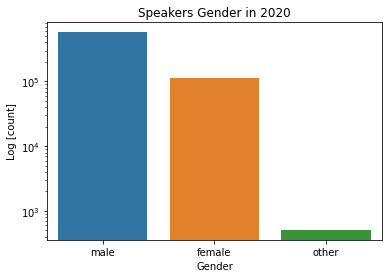

In [37]:
### plot of the speakers proportion (here for 2020)

ax = sns.countplot(x="gen", data=dff)
ax.set(xlabel='Gender', ylabel='Log [count]')
ax.set_title('Speakers Gender in 2020')
plt.yscale("log")
plt.show()


### Pie charts of proportion of women throughout the 6 years:
cvs files of every year (that were generated one by one on our different computers using the code above) are now being loaded and presented in graphs. 

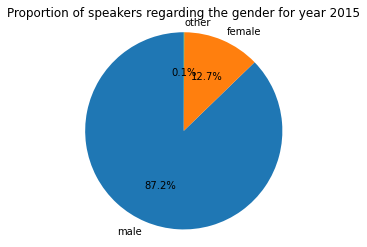

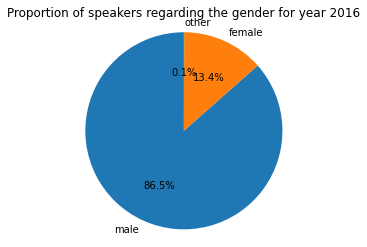

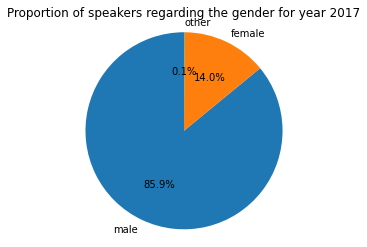

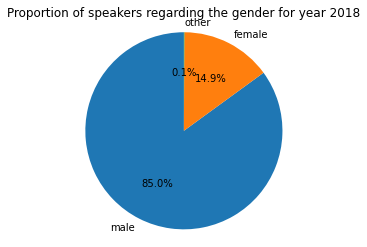

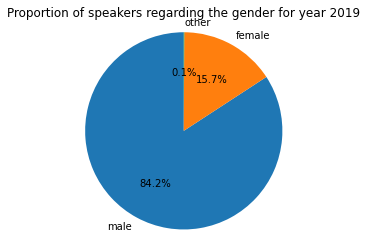

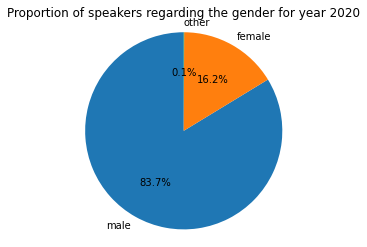

In [36]:
# pie charts of the results

colnames = ['qids','quoteid','gender']
path = r'C:/data/gen
all_files = glob.glob(path + "/*.csv")

li = []

import matplotlib.pyplot as plotter

year = 2015 #to have the right year on top of every chart. starting at year 2015

for filename in all_files:
    df = pd.read_csv(filename, header = None, index_col=0, names = colnames)
    male = df[df['gender'] == 'male'].gender.count()
    female = df[df['gender'] == 'female'].gender.count()
    other = df[df['gender'] == 'other'].gender.count()
    total = male + female + other
    
    # The slice names of a population distribution pie chart
    labels = ['male','female','other']
    
    # Population data
    sizes = [male/total, female/total, other/total]
    figureObject, axesObject = plotter.subplots()
    
    # Drawing the pie chart
    axesObject.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        normalize=False)
    
    # Aspect ratio - equal means pie is a circle
    axesObject.axis('equal')
    plt.title(f'Proportion of speakers regarding the gender for year {year}');
    plotter.show()
    
    li.append(df)
    
    year = year + 1 #to go through every year
    

allyears = pd.concat(li, axis=0, ignore_index=True)
allyears['quoteid'] = allyears['quoteid'].str[:-7];

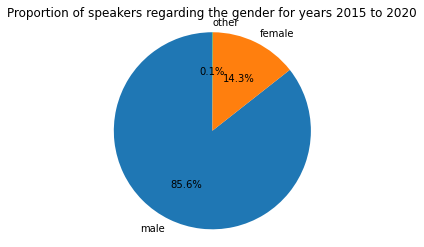

In [34]:
### Chart of all years together --> mean

male = allyears[allyears['gender'] == 'male'].gender.count()
female = allyears[allyears['gender'] == 'female'].gender.count()
other = allyears[allyears['gender'] == 'other'].gender.count()
total = male + female + other
# import the pyplot library

import matplotlib.pyplot as plotter
# The slice names of a population distribution pie chart
labels = ['male','female','other']
# Population data
sizes = [male/total, female/total, other/total]
figureObject, axesObject = plotter.subplots()

# Draw the pie chart
axesObject.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90)
# Aspect ratio - equal means pie is a circle

axesObject.axis('equal')
plt.title('Proportion of speakers regarding the gender for years 2015 to 2020');
plotter.show()